In [2]:
from IPython.display import HTML
file_path = 'images/mle_map.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [4]:
from IPython.display import HTML
file_path = 'images/mle_map2.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [5]:
from IPython.display import HTML
file_path = 'images/text.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [8]:
import numpy as np

In [13]:
K = int(input("Enter the degree of the polynomial K: "))
while True:
    a = float(input("Enter the start of the range a: "))
    b = float(input("Enter the end of the range b: "))
    if a < b:
        break
    else:
        print("The start of the range must be less than the end of the range. Please try again.")

N = int(input("Enter the number of data points N: "))

X = np.linspace(a, b, N)

theta_true = np.ones((K+1,))

def poly(x,theta):
    y = 0
    for i in range(len(theta_true)):
         y += theta[i] * x**i 
    return y

sigma = float(input("Enter the variance of the Gaussian noise sigma^2: "))
Y = poly(X, theta_true) + np.random.normal(0, np.sqrt(sigma), N)
print(f"Generated test dataset for variance {sigma}:")
print("X:", X)
print("Y:", Y)

# Grado del Polinomio (K): 2
# Intervallo (a, b): 0, 10
# Numero di Punti Dati (N): 100
# Varianza del Rumore (sigma^2): 1

Generated test dataset for variance 1.0:
X: [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.878

In [18]:
import numpy as np

X = np.linspace(a, b, N) 
#K = ...  # Grado del polinomio
theta_true = np.ones(K+1)  
Phi_X = np.vander(X, K+1, increasing=True)
Y = Phi_X @ theta_true
D = (X, Y)

print(f"Shape of X: {X.shape}")
print(f"Shape of Phi_X (Vandermonde Matrix): {Phi_X.shape}")
print(f"Shape of theta_true: {theta_true.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (100,)
Shape of Phi_X (Vandermonde Matrix): (100, 3)
Shape of theta_true: (3,)
Shape of Y: (100,)


In [19]:
import numpy as np

def compute_MLE(X, Y, K):
    # Calcola la matrice di Vandermonde per X
    Phi_X = np.vander(X, K+1, increasing=True)

    # Calcola la soluzione MLE usando le equazioni normali
    # θ_MLE = (Phi_X^T * Phi_X)^(-1) * Phi_X^T * Y
    theta_MLE = np.linalg.pinv(Phi_X.T @ Phi_X) @ Phi_X.T @ Y

    return theta_MLE

# Esempio di utilizzo della funzione
K = 3  # Grado del polinomio
X = np.linspace(0, 10, 100)  # Valori di X
Y = np.random.randn(100)  # Valori di Y (esempio casuale)

theta_MLE = compute_MLE(X, Y, K)
print("Coefficients MLE:", theta_MLE)


Coefficients MLE: [ 0.11760769  0.06561412 -0.00576603 -0.00071585]


In [20]:
import numpy as np

def compute_SGD(X, Y, K, epochs, learning_rate):
    # Calcola la matrice di Vandermonde per X
    Phi_X = np.vander(X, K+1, increasing=True)

    # Inizializza i parametri (theta) a zero
    theta = np.zeros(K+1)

    # Numero di esempi di addestramento
    n = len(Y)

    # Loop di addestramento
    for _ in range(epochs):
        # Mescola il dataset
        indices = np.random.permutation(n)
        Phi_X_shuffled = Phi_X[indices]
        Y_shuffled = Y[indices]

        for i in range(n):
            # Calcola l'errore
            error = (Phi_X_shuffled[i] @ theta) - Y_shuffled[i]

            # Aggiorna theta
            theta -= learning_rate * error * Phi_X_shuffled[i]

    return theta

# Esempio di utilizzo della funzione
K = 3  # Grado del polinomio
epochs = 1000  # Numero di epochs
learning_rate = 0.001  # Tasso di apprendimento

X = np.linspace(0, 10, 100)  # Valori di X
Y = np.random.randn(100)  # Valori di Y (esempio casuale)

theta_MLE = compute_SGD(X, Y, K, epochs, learning_rate)
print("Coefficients MLE (SGD):", theta_MLE)

<ipython-input-20-75b48f22d183>:35: RuntimeWarning: overflow encountered in matmul
  error = (Phi_X_shuffled[i] @ theta) - Y_shuffled[i]
<ipython-input-20-75b48f22d183>:38: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * error * Phi_X_shuffled[i]


Coefficients MLE (SGD): [nan nan nan nan]


In [10]:
import numpy as np

def compute_vandermonde_matrix(X, K):
    return np.vander(X, K+1, increasing=True)

def maximum_likelihood_estimation(X, Y, K):
    vander_X = compute_vandermonde_matrix(X, K)
    
    # Compute the MLE estimate using the normal equation
    # theta_MLE = (X^T * X)^(-1) * X^T * Y
    theta_MLE = np.linalg.inv(vander_X.T.dot(vander_X)).dot(vander_X.T).dot(Y)
    
    return theta_MLE


theta_MLE = maximum_likelihood_estimation(X, Y, K)
print(theta_MLE)

[1.19226683 1.04919162 0.98791404]


The Mean Absolute Error of the model is: 0.47833193930800716


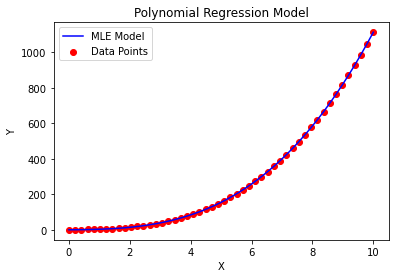

In [11]:
import matplotlib.pyplot as plt

def evaluate_model(X, Y, theta):
    predictions = compute_vandermonde_matrix(X, len(theta)-1).dot(theta)
    return np.mean(np.abs(predictions - Y))

def plot_model(X, Y, theta):
    plt.scatter(X, Y, color='red', label='Data Points')
    X_plot = np.linspace(min(X), max(X), 1000)  # finer grid for a smoother curve
    Y_plot = compute_vandermonde_matrix(X_plot, len(theta)-1).dot(theta)
    plt.plot(X_plot, Y_plot, color='blue', label='MLE Model')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Regression Model')
    plt.show()

# Evaluate the model
error = evaluate_model(X, Y, theta_MLE)
print(f"The Mean Absolute Error of the model is: {error}")

# Plot the model
plot_model(X, Y, theta_MLE)
